San Mateo Open Data Example
===========================

### Data Details:  This comes from water sampling from San Mateo : https://dev.socrata.com/foundry/datahub.smcgov.org/4ss4-5dcw

Collected Data from Surfer's Beach Rollup


---

### Library Imports

In [1]:
# key DS library imports
import numpy as np
import pandas as pd
import datetime
import urllib


In [2]:
# Visualization with altair
import matplotlib.pyplot as plt

This particular data set has the following REST endpoint: https://data.smcgov.org/resource/224p-x9qf.json



In [34]:
# Socratta API query
query = ("https://datahub.smcgov.org/resource/4ss4-5dcw.json?"
         "&$limit=10000")

In [35]:
raw_data = pd.read_json(query)

---

### Data Checkout


In [29]:
raw_data.head()

,site_id,site_name,site_type,enterolert_enterococci_rst,colilert_18_e_coli_rslt,colilert_18_total_coliform_rst,enterolert_enterococci_pst,colilert_18_e_coli_pst,colilert_18_total_coliform_pst,enterolert_enterococci_qfr,colilert_18_e_coli_qfr,colilert_18_total_coliform_qfr,location_address,location_city,location_state,location_zip,location,:@computed_region_i2t2_cryp
0,AB41120,SURFERS BEACH,BEACH,10.0,10.0,10.0,N,N,N,<,<,<,37 500956757039624,,,,NaN,NaN
1,AB41120,SURFERS BEACH,BEACH,63.0,75.0,135.0,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,94019,"{'type': 'Point', 'coordinates': [-122.4712841...",28590.0
2,AB41120,SURFERS BEACH,BEACH,10.0,10.0,63.0,N,N,N,<,<,NaN,NaN,NaN,NaN,94019,"{'type': 'Point', 'coordinates': [-122.4712841...",28590.0
3,AB41120,SURFERS BEACH,BEACH,10.0,10.0,10.0,N,N,N,<,<,<,NaN,NaN,NaN,94019,"{'type': 'Point', 'coordinates': [-122.4712841...",28590.0
4,AB41120,SURFERS BEACH,BEACH,10.0,10.0,10.0,N,N,N,<,<,<,NaN,NaN,NaN,94019,"{'type': 'Point', 'coordinates': [-122.4712841...",28590.0


---

### Data Processing and Visualization


Text(0, 0.5, 'Counts')

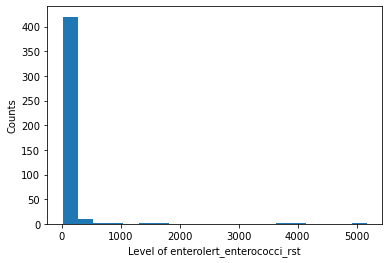

In [36]:
plt.hist(raw_data.enterolert_enterococci_rst, 20)
plt.xlabel('Level of enterolert_enterococci_rst')
plt.ylabel('Counts')

Text(0, 0.5, 'level of enterolert_enterococci_rst')

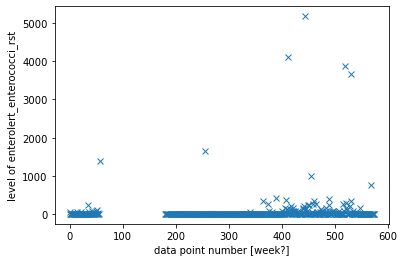

In [33]:
plt.plot(raw_data.enterolert_enterococci_rst, 'x')
plt.xlabel('data point number [week?]')
plt.ylabel('level of enterolert_enterococci_rst')

---

Method and Notes
================

- The Socrata API docs presume that you understand how characters like spaces, dashes, etc., are translated into HTML friendly characters.  Therefore, the API requires things like `group=This%20is%20a%20test`


The city of San Mateo has an [open data platform](https://data.smcgov.org/) in which it publishes its election rolls and many other items.  

The goal of this notebook is both as a technology learning exercise and a demonstration and exploration of what can be done with this public data.  The technology aspect lies on several layers -- a part that is related to the interface with the external government server using the Socrata API, a part that is related to data analysis tooling that is apparent in the text of this notebook, and a third part that is a layer behind the ipython notebook -- see note below.  

The Socrata API has been adopted by many government agencies at the municipal, state, and federal level.  It provides a more or less standardized way to access data via a REST endpoint.  There are SQL-like query facilities in the API.


---

### Information Retrieval

The [Socrata API](https://dev.socrata.com/consumers/getting-started.html) is called "SODA" and has the following search terms:

* limit - this is a limit on the number of rows collected with a max of 50k
* offset - this is the starting row index, which is useful for paging
* _any data column_ - can be used to subset the data with an equality filter
* query - this can be used as a single string or as a piecemeal query as described [here](https://datahub.smcgov.org/resource/4ss4-5dcw.json)

